In [1]:
from convpers import CPT
from convpers import Vectorize
from convpers import Testing
from convpers import Filters

%load_ext autoreload
%autoreload 2

In [2]:
#Load data
from tensorflow import keras
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
X = train_images[:5000]
y = train_labels[:5000]

kNN Results:  [0.24235153 0.23635273 0.24729892]
Gradient Boosting Results:  [0.31253749 0.29034193 0.31992797]


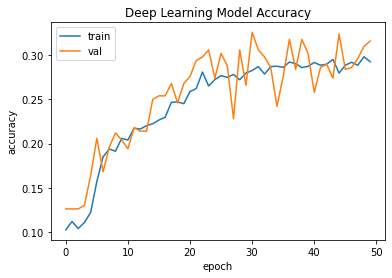

In [3]:
#Experiment 1A: No Convolutions, Persistence Images Concatenated
filter = Filters.blur_kernel(1)
diagrams = CPT.CPT(X,[filter])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.24235153 0.23635273 0.24729892]
Gradient Boosting Results:  [0.31253749 0.29034193 0.31992797]


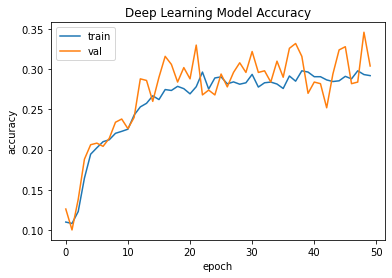

In [4]:
#Experiment 1B: No Convolutions, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.28134373 0.27234553 0.29471789]
Gradient Boosting Results:  [0.31853629 0.32873425 0.33133253]


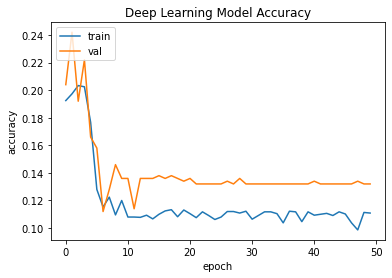

In [5]:
#Experiment 1C: No Convolutions, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.28134373 0.27234553 0.29471789]
Gradient Boosting Results:  [0.31853629 0.32873425 0.33133253]


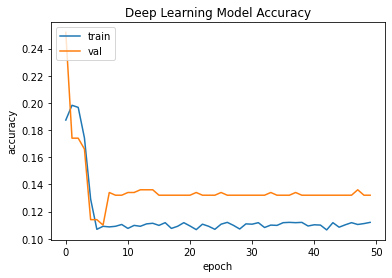

In [6]:
#Experiment 1D: No Convolutions, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.24715057 0.29034193 0.272509  ]
Gradient Boosting Results:  [0.48110378 0.49970006 0.47058824]


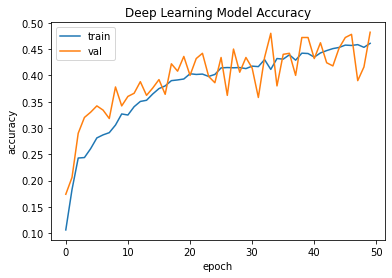

In [7]:
#Experiment 2A: Adding Convolutions with Standard Filters, Persistence Images Concatenated
filter1 = Filters.blur_kernel(1)
filter2 = Filters.blur_kernel(3)
filter3 = Filters.gaussian_kernel(3)
filter4 = Filters.sharpening_kernel(3)
diagrams = CPT.CPT(X,[filter1,filter2,filter3,filter4])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.27354529 0.29874025 0.29471789]
Gradient Boosting Results:  [0.47510498 0.4925015  0.47839136]


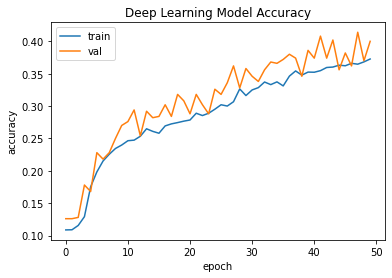

In [8]:
#Experiment 2B: Adding Convolutions with Standard Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.24295141 0.27654469 0.27971188]
Gradient Boosting Results:  [0.50209958 0.5194961  0.50720288]


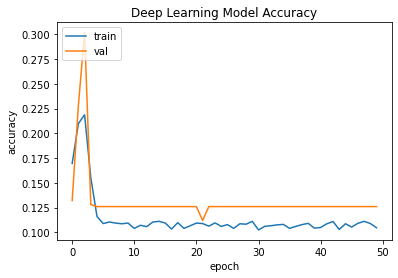

In [9]:
#Experiment 2C: Adding Convolutions with Standard Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.23275345 0.26694661 0.26470588]
Gradient Boosting Results:  [0.31013797 0.32093581 0.32352941]


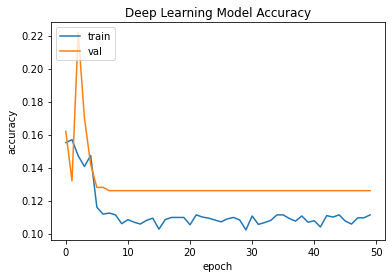

In [10]:
#Experiment 2D: Adding Convolutions with Standard Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.48530294 0.47870426 0.49219688]
Gradient Boosting Results:  [0.6244751  0.68386323 0.64465786]


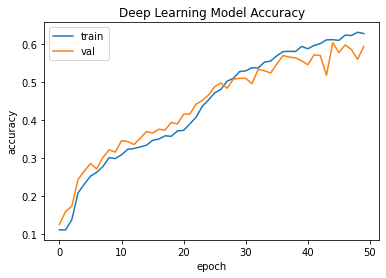

In [11]:
#Experiment 3A: Adding Convolutions with EigenFilters, Persistence Images Concatenated
eigen_filters = Filters.PCA_eigenfilters(X,l=3,n=3)
filters = Filters.random_linear_comb(eigen_filters,5)
diagrams = CPT.CPT(X,filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.42471506 0.42411518 0.44297719]
Gradient Boosting Results:  [0.61007798 0.65206959 0.63085234]


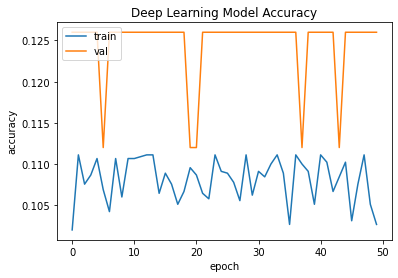

In [12]:
#Experiment 3B: Adding Convolutions with EigenFilters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.61127774 0.64487103 0.63805522]
Gradient Boosting Results:  [0.65686863 0.65866827 0.67166867]


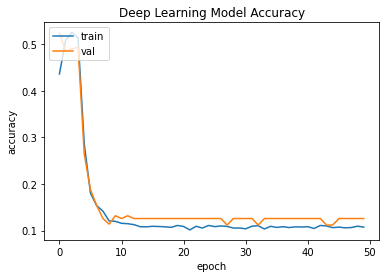

In [13]:
#Experiment 3C: Adding Convolutions with EigenFilters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.41391722 0.46010798 0.44537815]
Gradient Boosting Results:  [0.4685063 0.5104979 0.4969988]


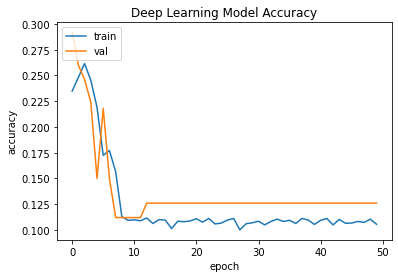

In [14]:
#Experiment 3D: Adding Convolutions with EigenFilters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.4295141  0.4355129  0.43277311]
Gradient Boosting Results:  [0.56268746 0.61787642 0.57623049]


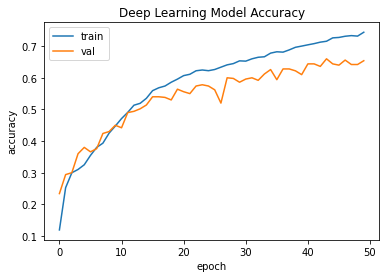

In [15]:
#Experiment 4A: Random Filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=5)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.40011998 0.41091782 0.3967587 ]
Gradient Boosting Results:  [0.56928614 0.58908218 0.55102041]


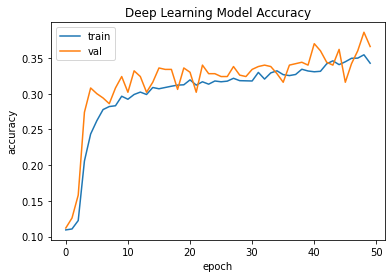

In [16]:
#Experiment 4B: Random Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.61667666 0.63227355 0.6062425 ]
Gradient Boosting Results:  [0.65386923 0.67306539 0.6302521 ]


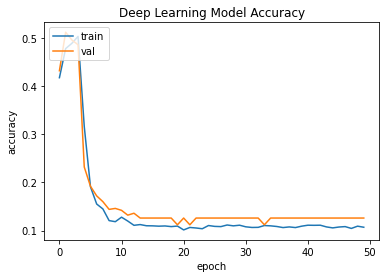

In [17]:
#Experiment 4C: Random Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.40371926 0.43911218 0.40996399]
Gradient Boosting Results:  [0.45590882 0.48710258 0.45678271]


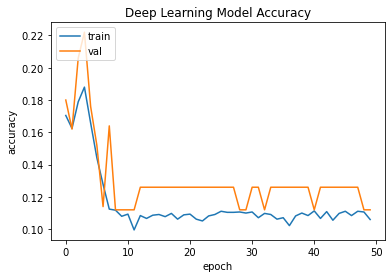

In [18]:
#Experiment 4D: Random Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.51829634 0.53989202 0.515006  ]
Gradient Boosting Results:  [0.67126575 0.71205759 0.68127251]


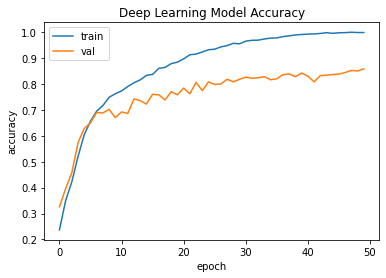

In [19]:
#Experiment 5A: Lots of random filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=25)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.46190762 0.47630474 0.46098439]
Gradient Boosting Results:  [0.5914817  0.62687463 0.60984394]


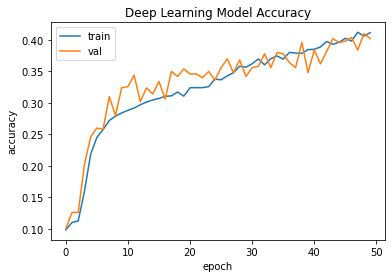

In [20]:
#Experiment 5B: Lots of random filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.75464907 0.78464307 0.77370948]
Gradient Boosting Results:  [0.74745051 0.78044391 0.73409364]


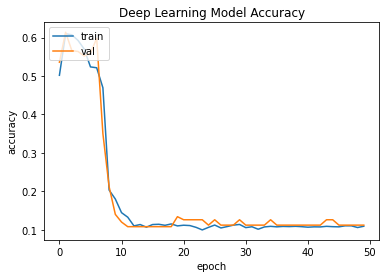

In [21]:
#Experiment 5C: Lots of random filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.41271746 0.45590882 0.45138055]
Gradient Boosting Results:  [0.4775045  0.51409718 0.48919568]


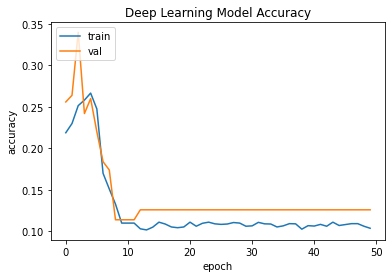

In [22]:
#Experiment 5D: Lots of random filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)